In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [161]:

df= pd.read_csv('/content/Housing (1).csv')
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [162]:
df.shape

(545, 13)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [164]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [165]:
df.isnull().sum().sort_values(ascending=False)

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [166]:
(df.isnull().sum() / len(df)) * 100


,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


In [167]:
#separate numerical and categorical vdeatures
#imp step for regression
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include="object").columns

print("Numerical columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))


Numerical columns: 6
Categorical columns: 7


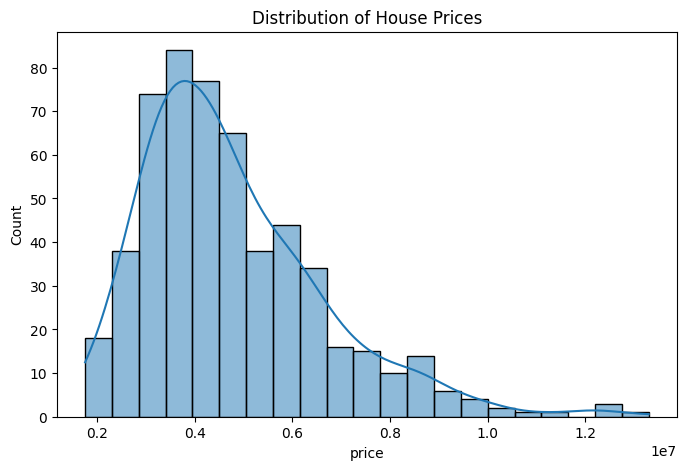

In [168]:
#target variables
plt.figure(figsize=(8,5))
sns.histplot(df["price"], kde=True)
plt.title("Distribution of House Prices")
plt.show()


In [169]:
#The target variable (house price) shows a right-skewed distribution, indicating the presence of high-priced outliers. This may affect linear regression performance and motivates the use of transformation techniques in preprocessing.”

In [170]:
df["price"].skew()


np.float64(1.2122388370279802)

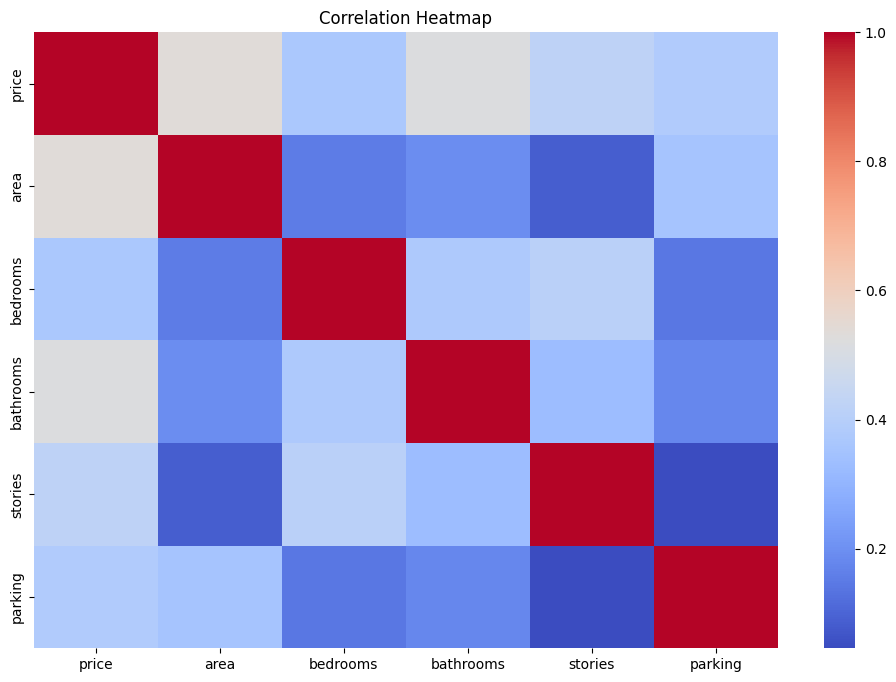

In [171]:
#Correlation analysis
plt.figure(figsize=(12,8))
corr = df[num_cols].corr()

sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


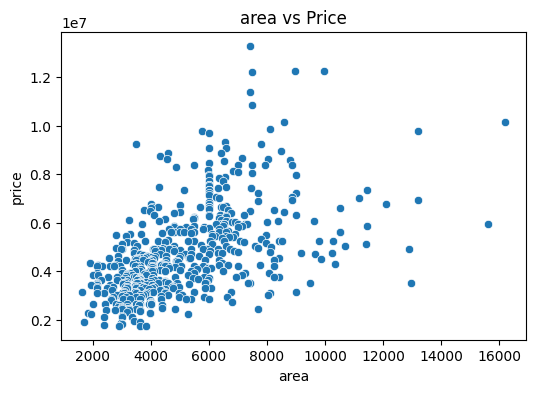

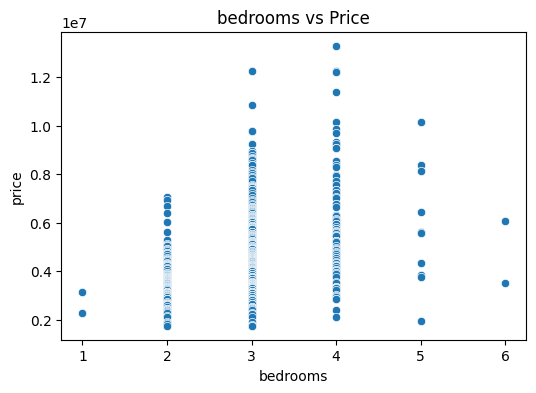

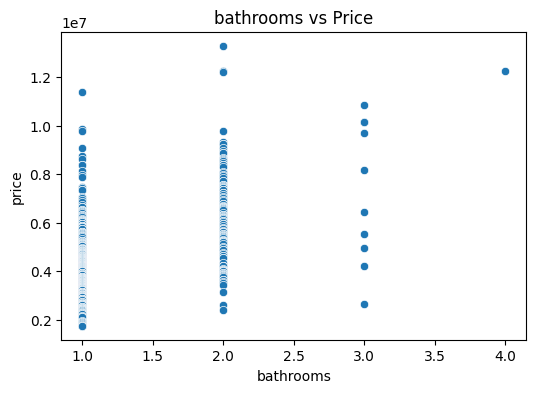

In [172]:
important_features = ["area", "bedrooms", "bathrooms"]  # adjust

for col in important_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df["price"])
    plt.title(f"{col} vs Price")
    plt.show()


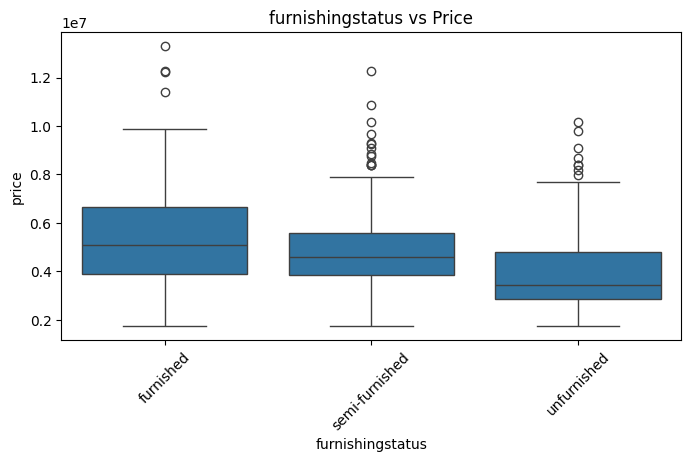

In [173]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["furnishingstatus"], y=df["price"])
plt.xticks(rotation=45)
plt.title("furnishingstatus vs Price")
plt.show()


In [174]:
#Preprocessing
#Preparing the dataset so Linear, Ridge, Random Forest, Gradient Boosting can learn fairly and effectively.
X = df.drop("price", axis=1)
y = df["price"]


In [175]:
y_log = np.log1p(y)
#Because price was right-skewed


In [176]:
num_features = X.select_dtypes(include=np.number).columns
cat_features = X.select_dtypes(include="object").columns

num_features, cat_features


(Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object'),
 Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
        'airconditioning', 'prefarea', 'furnishingstatus'],
       dtype='object'))

In [177]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
X[num_features] = num_imputer.fit_transform(X[num_features])
#numerical feautures median(robust at outliers)


In [178]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
X[num_features] = num_imputer.fit_transform(X[num_features])
#catergorical features = most frequent


In [179]:
X.columns


Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [180]:

X = df.drop("price", axis=1)
y = df["price"]

# Identify categorical & numerical columns
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(include="number").columns


In [181]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

X[num_features] = num_imputer.fit_transform(X[num_features])
X[cat_features] = cat_imputer.fit_transform(X[cat_features])


In [182]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop="first", sparse_output=False)

encoded_cat = encoder.fit_transform(X[cat_features])

encoded_cat_df = pd.DataFrame(
    encoded_cat,
    columns=encoder.get_feature_names_out(cat_features),
    index=X.index
)

X = pd.concat([X[num_features], encoded_cat_df], axis=1)


In [183]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)


In [184]:
#Trai test split
from sklearn.model_selection import train_test_split

y_log = np.log1p(y)  # target already discussed

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_log, test_size=0.2, random_state=42
)


In [185]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "LinearRegression": LinearRegression(),
    "RidgeRegression": Ridge(alpha=1.0),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42)
}


In [186]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    })


In [187]:
results_df = pd.DataFrame(results)
results_df


,Model,MAE,MSE,RMSE,R2 Score
0,LinearRegression,0.199903,0.063294,0.251582,0.672205
1,RidgeRegression,0.199876,0.063308,0.251612,0.672128
2,RandomForestRegressor,0.209843,0.071415,0.267236,0.630145
3,GradientBoostingRegressor,0.197306,0.063296,0.251588,0.672190


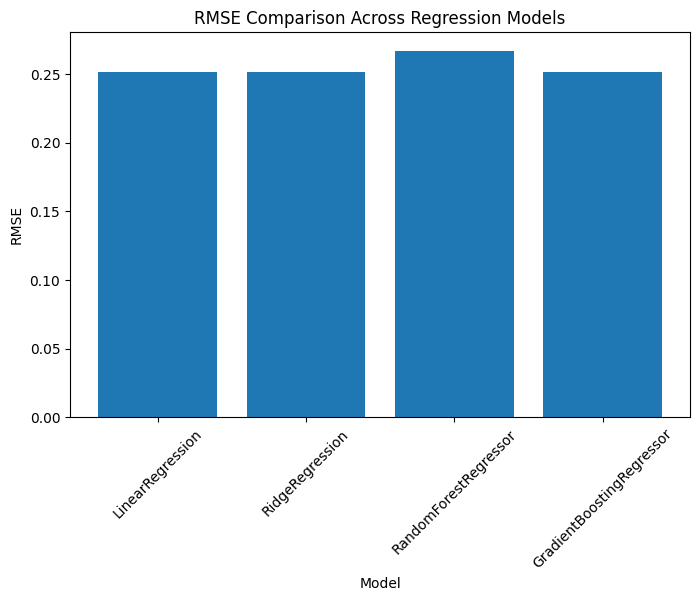

In [188]:
#RMSE comaprison plot

plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["RMSE"])
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE Comparison Across Regression Models")
plt.xticks(rotation=45)
plt.show()


<BarContainer object of 4 artists>

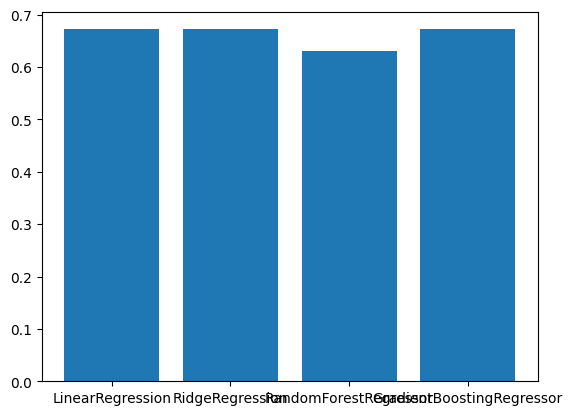

In [189]:
plt.bar(results_df["Model"], results_df["R2 Score"])


In [190]:
results_df["Rank"] = (
    results_df["RMSE"].rank(method="min") +
    results_df["MAE"].rank(method="min") -
    results_df["R2 Score"].rank(method="min")
)

results_df.sort_values("Rank")
#RMSE.rank() + MAE.rank() - R2.rank()
#Rule:Lowest RMS ;If tie → Highest R² ;If still tie → Simpler model


,Model,MAE,MSE,RMSE,R2 Score,Rank
0,LinearRegression,0.199903,0.063294,0.251582,0.672205,0.0
3,GradientBoostingRegressor,0.197306,0.063296,0.251588,0.672190,0.0
1,RidgeRegression,0.199876,0.063308,0.251612,0.672128,3.0
2,RandomForestRegressor,0.209843,0.071415,0.267236,0.630145,7.0


Although ensemble models were evaluated, Linear Regression achieved comparable performance with lower complexity, making it the most suitable model for this dataset.

In [191]:
best_model_name = 'LinearRegression'
best_model = models[best_model_name]
best_model.fit(X_train, y_train)


LinearRegression()

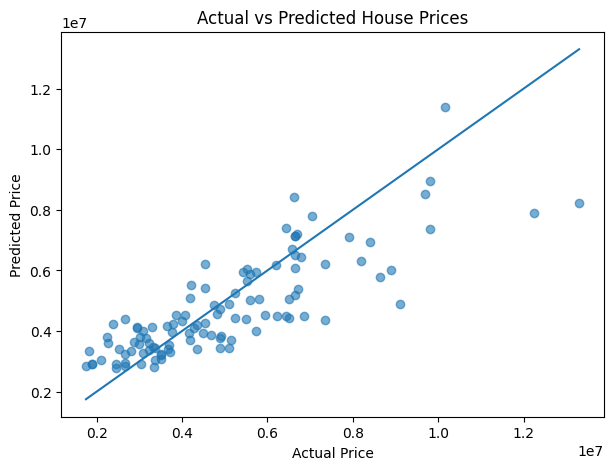

In [192]:
#Showing Predictions vs Actual

y_pred_log = best_model.predict(X_test)

y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

plt.figure(figsize=(7,5))
plt.scatter(y_test_real, y_pred_real, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot(
    [y_test_real.min(), y_test_real.max()],
    [y_test_real.min(), y_test_real.max()]
)
plt.show()



In [193]:
import joblib
#joblib is a Python library used to save and load trained machine learning models.
#A storage box for your trained model’s brain
#Once a model is trained, joblib lets you freeze it, store it, and reuse it later without retraining

joblib.dump(best_model, "best_house_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [194]:
import os
os.listdir()


['.config',
 'Housing (1).csv',
 'scaler.pkl',
 'best_house_price_model.pkl',
 'sample_data']